In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

train_df = pd.read_csv(
    r"D:\EXCEL R\Data Science\Assignments\6. Logistic Regression\Logistic Regression\Titanic_train.csv"
)

test_df = pd.read_csv(
    r"D:\EXCEL R\Data Science\Assignments\6. Logistic Regression\Logistic Regression\Titanic_test.csv"
)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


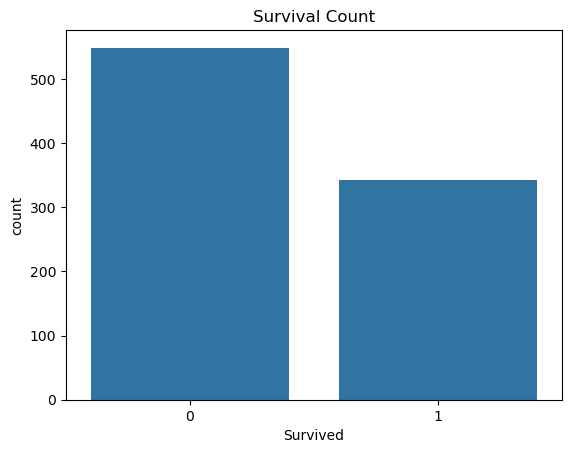

In [10]:
sns.countplot(x="Survived", data=train_df)
plt.title("Survival Count")
plt.show()

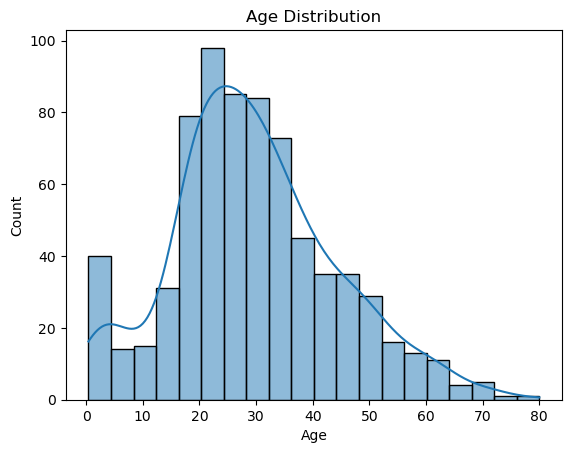

In [12]:
sns.histplot(train_df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

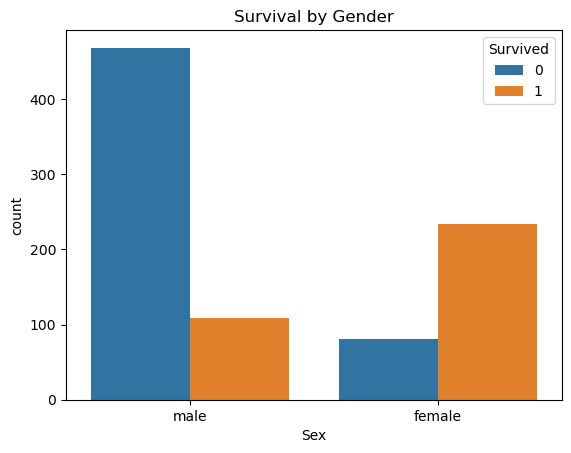

In [14]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Survival by Gender")
plt.show()

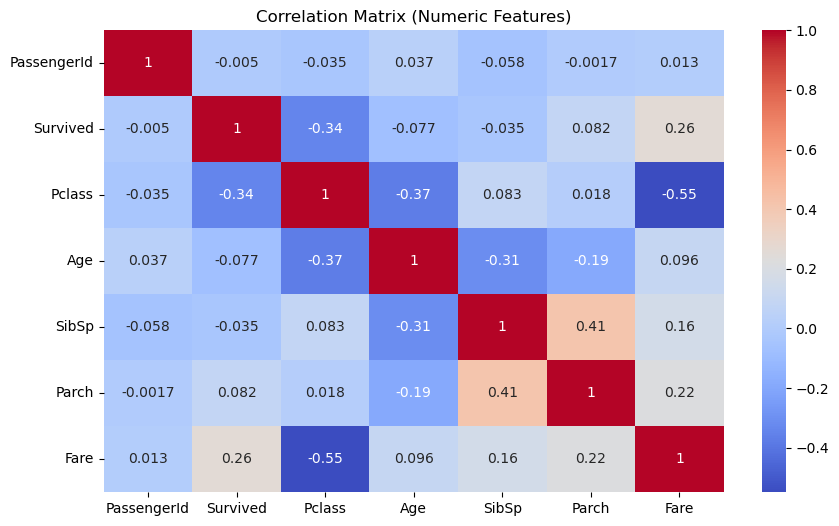

In [20]:
plt.figure(figsize=(10,6))

numeric_df = train_df.select_dtypes(include=["int64", "float64"])

sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")

plt.title("Correlation Matrix (Numeric Features)")
plt.show()

In [28]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [45]:
cols_to_encode = [col for col in ["Sex", "Embarked"] if col in train_df.columns]

train_df = pd.get_dummies(train_df, columns=cols_to_encode, drop_first=True)
test_df = pd.get_dummies(test_df, columns=cols_to_encode, drop_first=True)

X = train_df[[
    "Pclass", "Age", "SibSp", "Parch", "Fare",
    "Sex_male", "Embarked_Q", "Embarked_S"
]]

y = train_df["Survived"]

In [47]:
X = train_df[["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]]
y = train_df["Survived"]

X_test = test_df[X.columns]

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [51]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, roc_curve
)

y_pred = model.predict(X_val)
y_prob = model.predict_proba(X_val)[:, 1]

print("Accuracy :", accuracy_score(y_val, y_pred))
print("Precision:", precision_score(y_val, y_pred))
print("Recall   :", recall_score(y_val, y_pred))
print("F1 Score :", f1_score(y_val, y_pred))
print("ROC-AUC  :", roc_auc_score(y_val, y_prob))

Accuracy : 0.8100558659217877
Precision: 0.7857142857142857
Recall   : 0.7432432432432432
F1 Score : 0.7638888888888888
ROC-AUC  : 0.8824967824967825


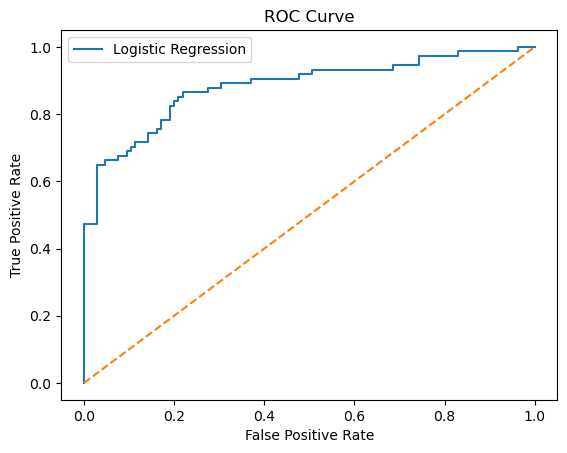

In [53]:
fpr, tpr, _ = roc_curve(y_val, y_prob)

plt.plot(fpr, tpr, label="Logistic Regression")
plt.plot([0,1],[0,1],'--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [55]:
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

coefficients

,Feature,Coefficient
4,Fare,0.002578
1,Age,-0.030579
3,Parch,-0.108310
6,Embarked_Q,-0.112689
2,SibSp,-0.295236
7,Embarked_S,-0.399760
0,Pclass,-0.938262
5,Sex_male,-2.591560


In [57]:
import joblib

joblib.dump(model, "titanic_model.pkl")

['titanic_model.pkl']